#1. Persiapan

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

W0819 04:09:29.220407 139982344898432 deprecation.py:323] From <ipython-input-1-25ba941030a3>:8: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0819 04:09:29.221792 139982344898432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0819 04:09:29.222838 139982344898432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting /tmp/data/train-images-idx3-ubyte.gz


W0819 04:09:29.484024 139982344898432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0819 04:09:29.486965 139982344898432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0819 04:09:29.541712 139982344898432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


#2. Menyiapkan Parameter

In [0]:
# Training Parameters
learning_rate = 0.001
batch_size = 256

epochs = 10
display_step = 1

#3. Membangun Convolutional Autoencoder

##3.1. Menyiapkan Input

In [0]:
?# tf Graph input
X = tf.placeholder(tf.float32, [None, 28,28,1])
X

Object `` not found.


<tf.Tensor 'Placeholder:0' shape=(?, 28, 28, 1) dtype=float32>

##3.2. Menyusun Arsitektur CAE

In [0]:
### Encoder
conv1 = tf.layers.conv2d(inputs=X, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=(2,2), strides=(2,2), padding='same')
# Now 14x14x16

conv2 = tf.layers.conv2d(inputs=maxpool1, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8

maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2), padding='same')                      
# Now 7x7x8

conv3 = tf.layers.conv2d(inputs=maxpool2, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu) 
# Now 7x7x8

maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2), padding='same')                      
# Now 4x4x8

W0819 04:09:29.814448 139982344898432 deprecation.py:323] From <ipython-input-4-2d99279a1db3>:1: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0819 04:09:29.822301 139982344898432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0819 04:09:30.070983 139982344898432 deprecation.py:323] From <ipython-input-4-2d99279a1db3>:4: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [0]:
### Bottle Neck
conv4 = tf.layers.conv2d(inputs=maxpool2, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 4x4x8

In [0]:
### Decoder
upsample1 = tf.image.resize_images(conv4, size=(7,7), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 7x7x8

conv5   = tf.layers.conv2d(inputs=upsample1, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16

concat1 = tf.concat([conv3, conv5], axis=3)                                                                         
# Now 7x7x64

upsample2 = tf.image.resize_images(conv3, size=(14,14), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)              
# Now 14x14x64

conv6   = tf.layers.conv2d(inputs=upsample2, filters=8, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x16

concat1 = tf.concat([conv2, conv6], axis=3)                                                                         
# Now 14x14x32

upsample2 = tf.image.resize_images(conv4, size=(28,28), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)              
# Now 28x28x32

conv7   = tf.layers.conv2d(inputs=upsample2, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x8

concat2 = tf.concat([conv1, conv7], axis=3)                                                                         
# Now 28x28x16

##3.3. Rekonsruksi

In [0]:
reconstructed = tf.layers.conv2d(inputs=concat2, filters=1, kernel_size=(3,3), padding='same', activation=None)
reconstructed_normalized = tf.nn.sigmoid(reconstructed)

##3.4. Loss dan Optimisasi

In [0]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=reconstructed))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0819 04:09:30.369418 139982344898432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#4. Training

In [0]:
session = tf.Session()
session.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(epochs):

  for i in range(total_batch):

    batch_x, _ = mnist.train.next_batch(batch_size)
    batch_x_reshaped = batch_x.reshape((-1, 28, 28, 1))

    _, c = session.run([optimizer, cost], feed_dict={X:batch_x_reshaped})

  if epoch % display_step == 0:
    print(f'epoch = {epoch}/{epochs-1}... cost = {c:.4f}')

print('Done!')

epoch = 0/9... cost = 0.0750
epoch = 1/9... cost = 0.0664
epoch = 2/9... cost = 0.0638
epoch = 3/9... cost = 0.0635
epoch = 4/9... cost = 0.0643
epoch = 5/9... cost = 0.0625
epoch = 6/9... cost = 0.0635
epoch = 7/9... cost = 0.0617
epoch = 8/9... cost = 0.0619
epoch = 9/9... cost = 0.0645
Done!


#5. Testing

##5.1. Testing 1

In [0]:
# Applying encode and decode over test set
example_to_show = 10

images = mnist.test.images[:example_to_show]
encode_decode1 = session.run(reconstructed_normalized, feed_dict={X: images.reshape((-1, 28, 28, 1))})

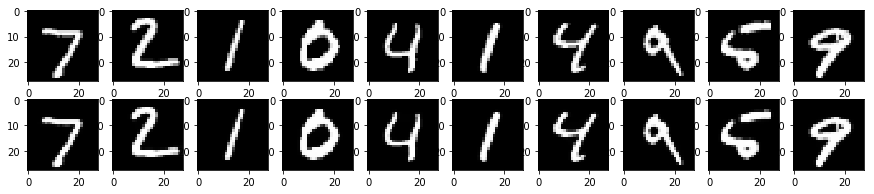

In [0]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(15, 3))
for i in range(example_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)), cmap='Greys_r')
    a[1][i].imshow(np.reshape(encode_decode1[i], (28, 28)), cmap='Greys_r')

##5.2. Testing 2

In [0]:
# Applying encode and decode over test set
noisy_images = images + 0.12 * np.random.randn(*images.shape)
noisy_images = np.clip(noisy_images, 0., 1.)

encode_decode2 = session.run(reconstructed_normalized, feed_dict={X: noisy_images.reshape((-1, 28, 28, 1))})

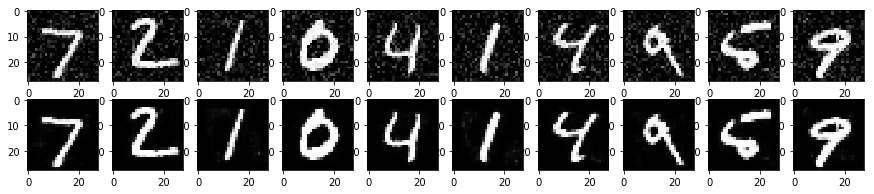

In [0]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(15, 3))
for i in range(example_to_show):
    a[0][i].imshow(np.reshape(noisy_images[i], (28, 28)), cmap='Greys_r')
    a[1][i].imshow(np.reshape(encode_decode2[i], (28, 28)), cmap='Greys_r')